In [1]:
import sys
sys.dont_write_bytecode = True
import numpy as np
from testing_suite import *
from parameters import *
from algorithm import *
import functions as fcn
import time
import matplotlib.pyplot as plt
import math
import itertools

In [2]:
c_fp = np.array([
    [172 - 137*43**0.5], 
    [215 + 44*43**0.5], 
    [49*(1003*43**0.5 - 989)/(288*math.pi)]
]) # N+1 x N-M coefficients c_fp[n',mu] [!] this line is specifically 2D

theory_parameters = Parameters(
    code = 'T', 
    beta_functions = fcn.beta, 
    fixed_point = np.array([343/(288*math.pi), -49/(288*math.pi)]), 
    true_result = 0.15, 
    linear_generating_function = fcn.F_fp, 
    M=1)

meta_parameters = Parameters(
    code = 'M', 
    collocation_point_numbers = np.array([np.array([18,3,4,16])]), 
    collocation_point_bounds = np.array([np.array([1,0.3,0.3,0.5])]), 
    basis_functions = np.array([fcn.psi]), 
    basis_functions_derivatives = np.array([fcn.dpsi]), 
    do_fix_parameters = np.array([True, False]), 
    population_size = np.array([10, 100]), 
    algorithm = np.array([GeneticAlgorithm('G', True)]))

control_parameters = Parameters(
    code = 'C', 
    fitness_function = np.array([None]), 
    selection = np.array([None]), 
    mutation = np.array([1,2,3]), 
    crossover = np.array([None]), 
    iteration_cap = np.array([5000]))

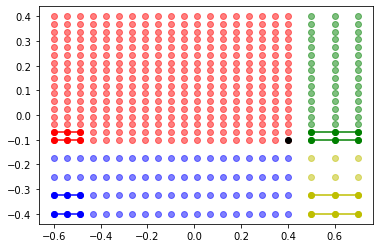

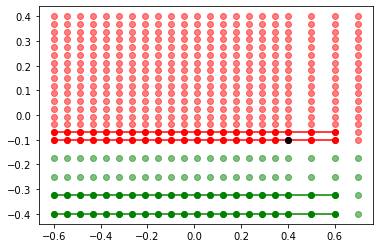

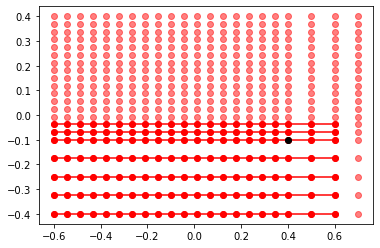

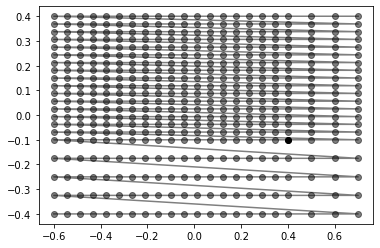

In [4]:
# grid
n_p = np.array([18,3,4,16]) # u-, u+, v-, v+
B_p = np.array([1,0.3,0.3,0.5]) # u-, u+, v-, v+
fp = np.array([0.4,-0.1]) # u, v

um = np.linspace(fp[0]-B_p[0], fp[0], n_p[0]+1) # u- to u*
up = np.linspace(fp[0], fp[0]+B_p[1], n_p[1]+1) # u* to u+
vm = np.linspace(fp[1]-B_p[2], fp[1], n_p[2]+1) # v- to v*
vp = np.linspace(fp[1], fp[1]+B_p[3], n_p[3]+1) # v* to v+

u_mp, v_mp = np.meshgrid(um, vp, indexing='ij') # exclude none
u_pp, v_pp = np.meshgrid(up[1:], vp, indexing='ij') # exclude u*
u_mm, v_mm = np.meshgrid(um, vm[:-1], indexing='ij') # exclude v*
u_pm, v_pm = np.meshgrid(up[1:], vm[:-1], indexing='ij') # exclude u* and v*

plt.figure()
plt.plot(u_mp, v_mp, marker='o', color='r', linestyle='none', alpha=0.5)
plt.plot(u_pp, v_pp, marker='o', color='g', linestyle='none', alpha=0.5)
plt.plot(u_mm, v_mm, marker='o', color='b', linestyle='none', alpha=0.5)
plt.plot(u_pm, v_pm, marker='o', color='y', linestyle='none', alpha=0.5)
plt.plot(u_mp[0:3,0:2], v_mp[0:3,0:2], marker='o', color='r')
plt.plot(u_pp[0:3,0:2], v_pp[0:3,0:2], marker='o', color='g')
plt.plot(u_mm[0:3,0:2], v_mm[0:3,0:2], marker='o', color='b')
plt.plot(u_pm[0:3,0:2], v_pm[0:3,0:2], marker='o', color='y')
plt.plot(fp[0], fp[1], marker='o', color='k')
plt.show()

u_vp = np.concatenate((u_mp, u_pp))
v_vp = np.concatenate((v_mp, v_pp))
u_vm = np.concatenate((u_mm, u_pm))
v_vm = np.concatenate((v_mm, v_pm))

plt.figure()
plt.plot(u_vp, v_vp, marker='o', color='r', linestyle='none', alpha=0.5)
plt.plot(u_vm, v_vm, marker='o', color='g', linestyle='none', alpha=0.5)
plt.plot(u_vp[0:21,0:2], v_vp[0:21,0:2], marker='o', color='r')
plt.plot(u_vm[0:21,0:2], v_vm[0:21,0:2], marker='o', color='g')
plt.plot(fp[0], fp[1], marker='o', color='k')
plt.show()

u = np.concatenate((u_vm, u_vp), axis=1)
v = np.concatenate((v_vm, v_vp), axis=1)

plt.figure()
plt.plot(u, v, marker='o', color='r', linestyle='none', alpha=0.5)
plt.plot(u[0:21,0:7], v[0:21,0:7], marker='o', color='r')
plt.plot(fp[0], fp[1], marker='o', color='k')
plt.show()

points = np.transpose(np.vstack([u.ravel(order='F'), v.ravel(order='F')]))

plt.figure()
plt.plot(points[:,0], points[:,1], marker='o', color='k', alpha=0.5)
plt.plot(fp[0], fp[1], marker='o', color='k')
plt.show()

In [5]:
# all permutations
my_dict = {
    'code': np.array([100001]),
    'A': np.arange(100,600,100),
    'B': np.arange(1000,6000,1000)
}

keys, values = zip(*my_dict.items())
permutations_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]

print(sorted([np.array(list(d.values())).sum() for d in permutations_dicts]))

[101101, 101201, 101301, 101401, 101501, 102101, 102201, 102301, 102401, 102501, 103101, 103201, 103301, 103401, 103501, 104101, 104201, 104301, 104401, 104501, 105101, 105201, 105301, 105401, 105501]


(5, 1000)


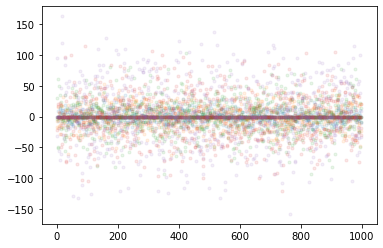

In [81]:
# gaussian mutation
pop = np.zeros((5,1000))
scores = np.arange(10,60,10)
print(pop.shape)
P = 0.7

gauss = np.random.normal(np.zeros(scores.shape), scores, pop.transpose().shape)
probability_mask = np.random.choice([0, 1], size=pop.transpose().shape, p=[1-P,P])
pop = np.add(pop, np.multiply(gauss, probability_mask).transpose())

plt.figure(7)
plt.plot(pop.transpose(), '.', alpha=0.1)
plt.show()

In [3]:
suite = Suite(theory_parameters=theory_parameters, meta_parameters=meta_parameters, control_parameters=control_parameters, export_directory='abc')
suite.run_all()
print(suite.get_combination_number())

12ta: 4/4 (100.0%%); Control: 3/3 (100.0%%); Total: 12/12 (100.0%%);
